In [1]:
from all_formulas import *
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd

In [2]:
b = 7.61
q0 = 1-1e-6
m = 20000
n = 1
a0 = 3
a1 = 7.7
tim = 5
init_pop = [1,0]
T = 5

In [3]:
ttr_values = [0,2,5,7]
q1_values = [1-1e-6,1-3e-6,1-5e-6]

In [4]:
simulation_data = {}
for ttr in range(len(ttr_values)):
    for q1 in range(len(q1_values)):
        simulation_data[(ttr,q1)] = simulation(init_pop,b,a0,a1,q0,q1_values[q1],m,n,tim,ttr_values[ttr])[:15000]

In [5]:
time_range = np.arange(0,15,0.001)

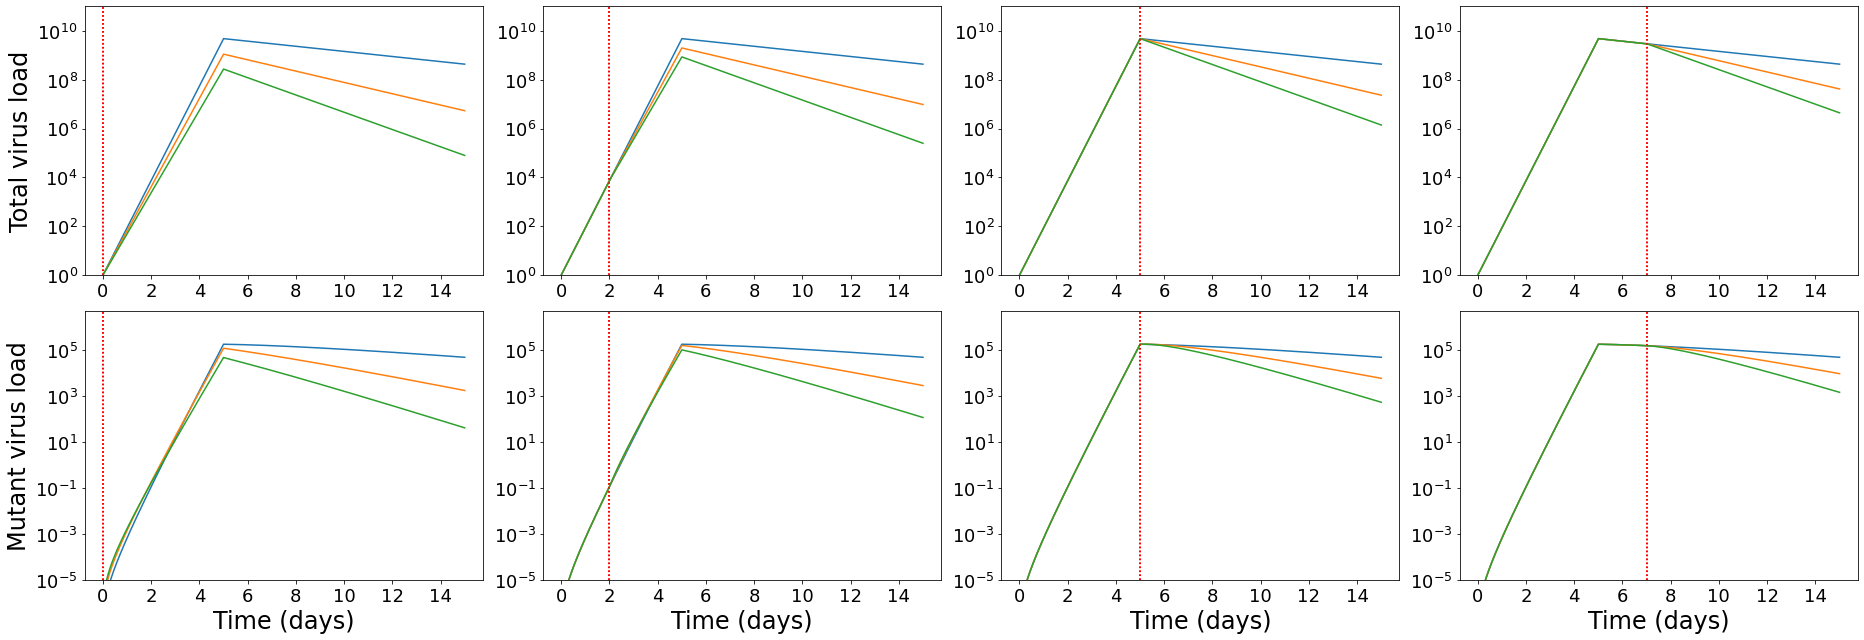

In [6]:
fig, ax = plt.subplots(2,4,figsize = (26,9))

for i in range(4):
    for j in range(3):
        ax[0,i].plot(time_range,simulation_data[(i,j)][:,0]+simulation_data[(i,j)][:,1])
        ax[1,i].plot(time_range,simulation_data[(i,j)][:,1])
        #if j > 0:
        #    ax[2,i].plot(time_range,simulation_data[(i,j)][:,1]/simulation_data[(i,0)][:,1], c='C'+str(j))
        ax[0,i].set_ylim(1,1e11)
        ax[1,i].set_ylim(1e-5,5e6)
        ax[0,i].axvline(ttr_values[i], linestyle = 'dotted', c = 'r')
        ax[1,i].axvline(ttr_values[i], linestyle = 'dotted', c = 'r')

for i in range(2):
    for j in range(4):
        ax[i,j].tick_params(labelsize = 18)
        ax[i,j].set_xticks(np.arange(0,16,2))
        ax[i,j].set_yscale('log')
        ax[1,j].set_xlabel('Time (days)', fontsize = 24)
        ax[1,j].tick_params(labelsize = 18)
        ax[1,j].set_xticks(np.arange(0,16,2))

ax[0,0].set_ylabel('Total virus load', fontsize = 24)
ax[1,0].set_ylabel('Mutant virus load', fontsize = 24)
        
plt.tight_layout()
plt.savefig('TimeSeries_FEB12.jpg', dpi = 400)

In [7]:
time_range_beforeT = np.arange(0,5,1e-3)
time_range_afterT = np.arange(0,10,1e-3)

In [8]:
m_range = np.linspace(1500,29900,50)
simulation_data_cumul = {}

b = 7.61
q0 = 1-1e-6
m = 20000
n = 1
a0 = 3
a1 = 7.7
tim = 5
init_pop = [1,0]
T = 5
q1 = 1-1e-6
tim = 5
ttr = 5

for m in range(len(m_range)):
    print(m)
    simulation_data_cumul[m] = simulation([1,0],b,a0,a1,q0,q1,m_range[m],n,tim,ttr)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


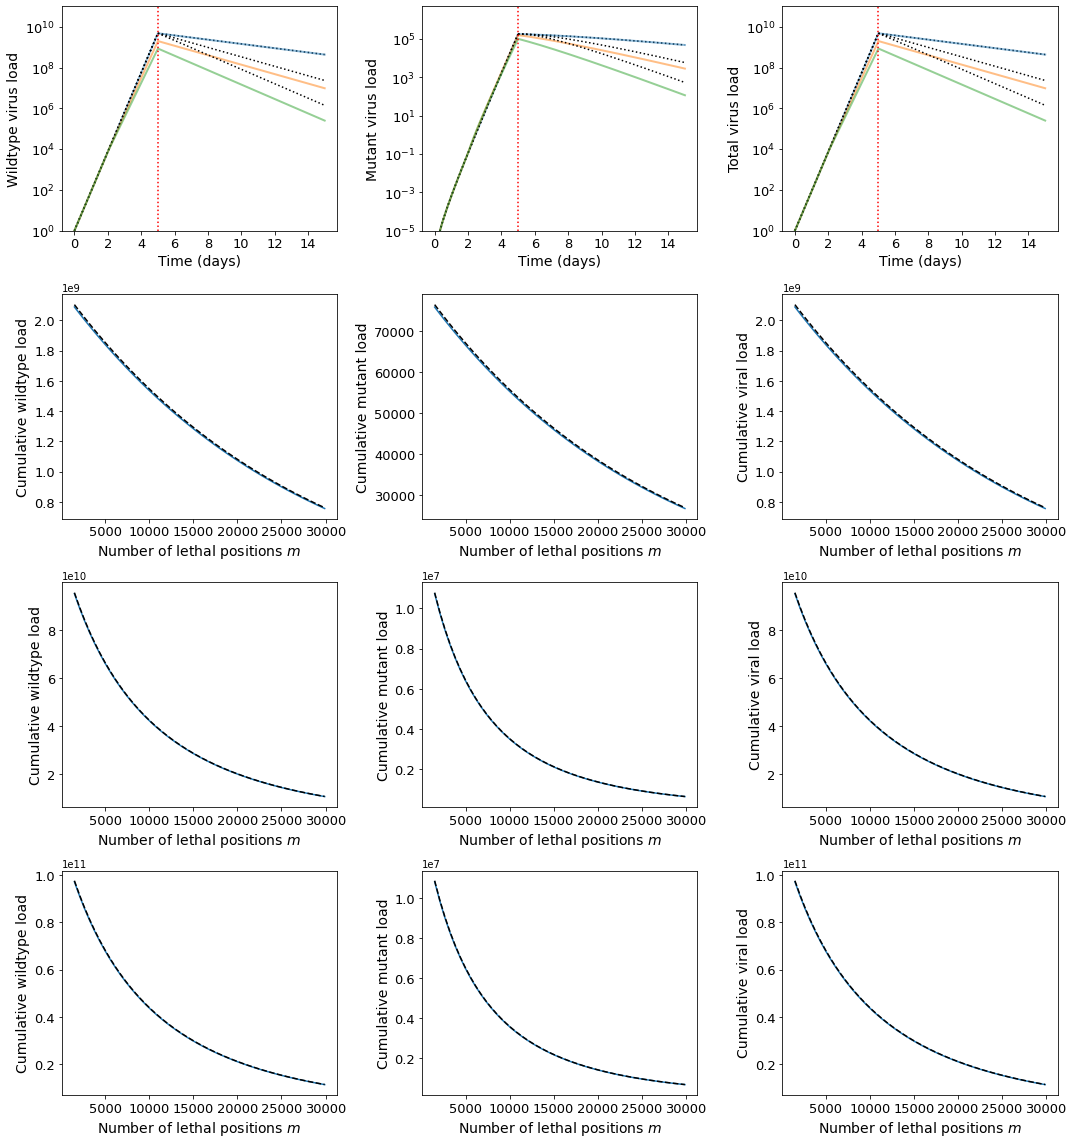

In [9]:
fig,ax = plt.subplots(4,3, figsize = (15,16))

x0, y0 = init_pop

for q1 in q1_values:

    m = 20000
    
    ax[0,0].plot(time_range_beforeT, func_x(time_range_beforeT, b, a0, q0, m, n, x0, y0), c = 'k', linestyle = 'dotted')
    ax[0,1].plot(time_range_beforeT, func_y(time_range_beforeT, b, a0, q0, m, n, x0, y0), c = 'k', linestyle = 'dotted')
    ax[0,2].plot(time_range_beforeT, func_v(time_range_beforeT, b, a0, q0, m, n, x0, y0), c = 'k', linestyle = 'dotted')
    
    x0c = func_x(5, b, a0, q0, m, n, x0, y0)
    y0c = func_y(5, b, a0, q0, m, n, x0, y0)
    
    ax[0,0].plot(time_range_afterT+5, func_x(time_range_afterT, b, a1, q1, m, n, x0c, y0c), c = 'k', linestyle = 'dotted')
    ax[0,1].plot(time_range_afterT+5, func_y(time_range_afterT, b, a1, q1, m, n, x0c, y0c), c = 'k', linestyle = 'dotted')
    ax[0,2].plot(time_range_afterT+5, func_v(time_range_afterT, b, a1, q1, m, n, x0c, y0c), c = 'k', linestyle = 'dotted')
    
    ax[0,0].plot(np.arange(0,15,1e-3), simulation_data[(1,q1_values.index(q1))][:,0][:15000], c = 'C'+str(q1_values.index(q1)), alpha = 0.5, linewidth = 2)
    ax[0,1].plot(np.arange(0,15,1e-3), simulation_data[(1,q1_values.index(q1))][:,1][:15000], c = 'C'+str(q1_values.index(q1)), alpha = 0.5, linewidth = 2)
    ax[0,2].plot(np.arange(0,15,1e-3), simulation_data[(1,q1_values.index(q1))][:,0][:15000]+simulation_data[(1,q1_values.index(q1))][:,1][:15000], c ='C'+str(q1_values.index(q1)), alpha = 0.5, linewidth = 2)
    
    ax[0,0].set_ylim(1,1e11)
    ax[0,1].set_ylim(1e-5,5e6)
    ax[0,2].set_ylim(1,1e11)
    
    ax[0,0].set_ylabel('Wildtype virus load', fontsize = 14)
    ax[0,1].set_ylabel('Mutant virus load', fontsize = 14)
    ax[0,2].set_ylabel('Total virus load', fontsize = 14)
    
    
### growth phase

cumul_Xgrowth = [np.sum(simulation_data_cumul[m][:,0][:5000])*1e-3 for m in range(50)]
analytical_Xgrowth = [growth_total_X(T, b, a0, q0, mval, n) for mval in m_range]
ax[1,0].plot(m_range, cumul_Xgrowth)
ax[1,0].plot(m_range, analytical_Xgrowth, linestyle = 'dashed', c='k')

cumul_Ygrowth = [np.sum(simulation_data_cumul[m][:,1][:5000])*1e-3 for m in range(50)]
analytical_Ygrowth = [growth_total_Y(T, b, a0, q0, mval, n) for mval in m_range]
ax[1,1].plot(m_range, cumul_Ygrowth)
ax[1,1].plot(m_range, analytical_Ygrowth, linestyle = 'dashed', c='k')

cumul_Vgrowth = [(np.sum(simulation_data_cumul[m][:,0][:5000]) + np.sum(simulation_data_cumul[m][:,1][:5000]))*1e-3 for m in range(50)]
analytical_Vgrowth = [growth_total_V(T, b, a0, q0, mval, n) for mval in m_range]
ax[1,2].plot(m_range, cumul_Vgrowth)
ax[1,2].plot(m_range, analytical_Vgrowth, linestyle = 'dashed', c='k')


### clearance phase
cumul_Xclearance = [np.sum(simulation_data_cumul[m][:,0][5000:])*1e-3 for m in range(50)]
analytical_Xclearance = [clearance_total_X(T, b, a0, a1, q0, mval, n) for mval in m_range]
ax[2,0].plot(m_range, cumul_Xclearance)
ax[2,0].plot(m_range, analytical_Xclearance, linestyle = 'dashed', c='k')

cumul_Yclearance = [np.sum(simulation_data_cumul[m][:,1][5000:])*1e-3 for m in range(50)]
analytical_Yclearance = [clearance_total_Y(T, b, a0, a1, q0, mval, n) for mval in m_range]
ax[2,1].plot(m_range, cumul_Yclearance)
ax[2,1].plot(m_range, analytical_Yclearance, linestyle = 'dashed', c='k')

cumul_Vclearance = [(np.sum(simulation_data_cumul[m][:,0][5000:]) + np.sum(simulation_data_cumul[m][:,1][5000:]))*1e-3 for m in range(50)]
analytical_Vclearance = [clearance_total_V(T, b, a0, a1, q0, mval, n) for mval in m_range]
ax[2,2].plot(m_range, cumul_Vclearance)
ax[2,2].plot(m_range, analytical_Vclearance, linestyle = 'dashed', c='k')



### growth + clearance phase
cumul_Xtotal = [np.sum(simulation_data_cumul[m][:,0])*1e-3 for m in range(50)]
analytical_Xtotal = [totalX_wholeinfection(T, b, a0, a1, q0, q0, mval, n) for mval in m_range]
ax[3,0].plot(m_range, cumul_Xtotal)
ax[3,0].plot(m_range, analytical_Xtotal, linestyle = 'dashed', c='k')

cumul_Ytotal = [np.sum(simulation_data_cumul[m][:,1])*1e-3 for m in range(50)]
analytical_Ytotal = [totalY_wholeinfection(T, b, a0, a1, q0, q0, mval, n) for mval in m_range]
ax[3,1].plot(m_range, cumul_Ytotal)
ax[3,1].plot(m_range, analytical_Ytotal, linestyle = 'dashed', c='k')

cumul_Vtotal = [(np.sum(simulation_data_cumul[m][:,0]) + np.sum(simulation_data_cumul[m][:,1]))*1e-3 for m in range(50)]
analytical_Vtotal = [totalV_wholeinfection(T, b, a0, a1, q0, q0, mval, n) for mval in m_range]
ax[3,2].plot(m_range, cumul_Vtotal)
ax[3,2].plot(m_range, analytical_Vtotal, linestyle = 'dashed', c='k')



plt.tight_layout()
    
for i in range(3):
    ax[0,i].set_yscale('log')
    ax[0,i].tick_params(labelsize = 13)
    ax[0,i].set_xticks(np.arange(0,15,2))
    ax[0,i].set_xlabel('Time (days)', fontsize = 14)
    ax[0,i].axvline(5, linestyle = 'dotted', c='r')
    
for i in range(1,4):
    for j in range(3):
        ax[i,j].set_xlabel('Number of lethal positions $m$', fontsize = 14)
        ax[i,j].tick_params(labelsize = 13)
        ax[i,0].set_ylabel('Cumulative wildtype load', fontsize = 14)
        ax[i,1].set_ylabel('Cumulative mutant load', fontsize = 14)
        ax[i,2].set_ylabel('Cumulative viral load', fontsize = 14)
        
plt.tight_layout()
plt.savefig('comparison_sim_analytical_FEB12.jpg', dpi = 400, bbox_inches = 'tight')